In [48]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

Data Claning

In [49]:
# read File
df = pd.read_excel(r"D:\project\MultipleDiseasePrediction\indian_liver_patient.xlsx")
# handel duplicate
duplicate = df.duplicated().sum()
df = df.drop_duplicates()
# handel nan values
print(df.isnull().sum())
df["Albumin_and_Globulin_Ratio"].fillna(df["Albumin_and_Globulin_Ratio"].median(),inplace=True)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2532\2016600085.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Albumin_and_Globulin_Ratio"].fillna(df["Albumin_and_Globulin_Ratio"].median(),inplace=True)


In [50]:
print(df.describe(include="all"))

               Age Gender  Total_Bilirubin  Direct_Bilirubin  \
count   570.000000    570       570.000000        570.000000   
unique         NaN      2              NaN               NaN   
top            NaN   Male              NaN               NaN   
freq           NaN    430              NaN               NaN   
mean     44.849123    NaN         3.321754          1.497544   
std      16.242182    NaN         6.267941          2.833231   
min       4.000000    NaN         0.400000          0.100000   
25%      33.000000    NaN         0.800000          0.200000   
50%      45.000000    NaN         1.000000          0.300000   
75%      58.000000    NaN         2.600000          1.300000   
max      90.000000    NaN        75.000000         19.700000   

        Alkaline_Phosphotase  Alamine_Aminotransferase  \
count             570.000000                570.000000   
unique                   NaN                       NaN   
top                      NaN                       NaN   

Outlayer

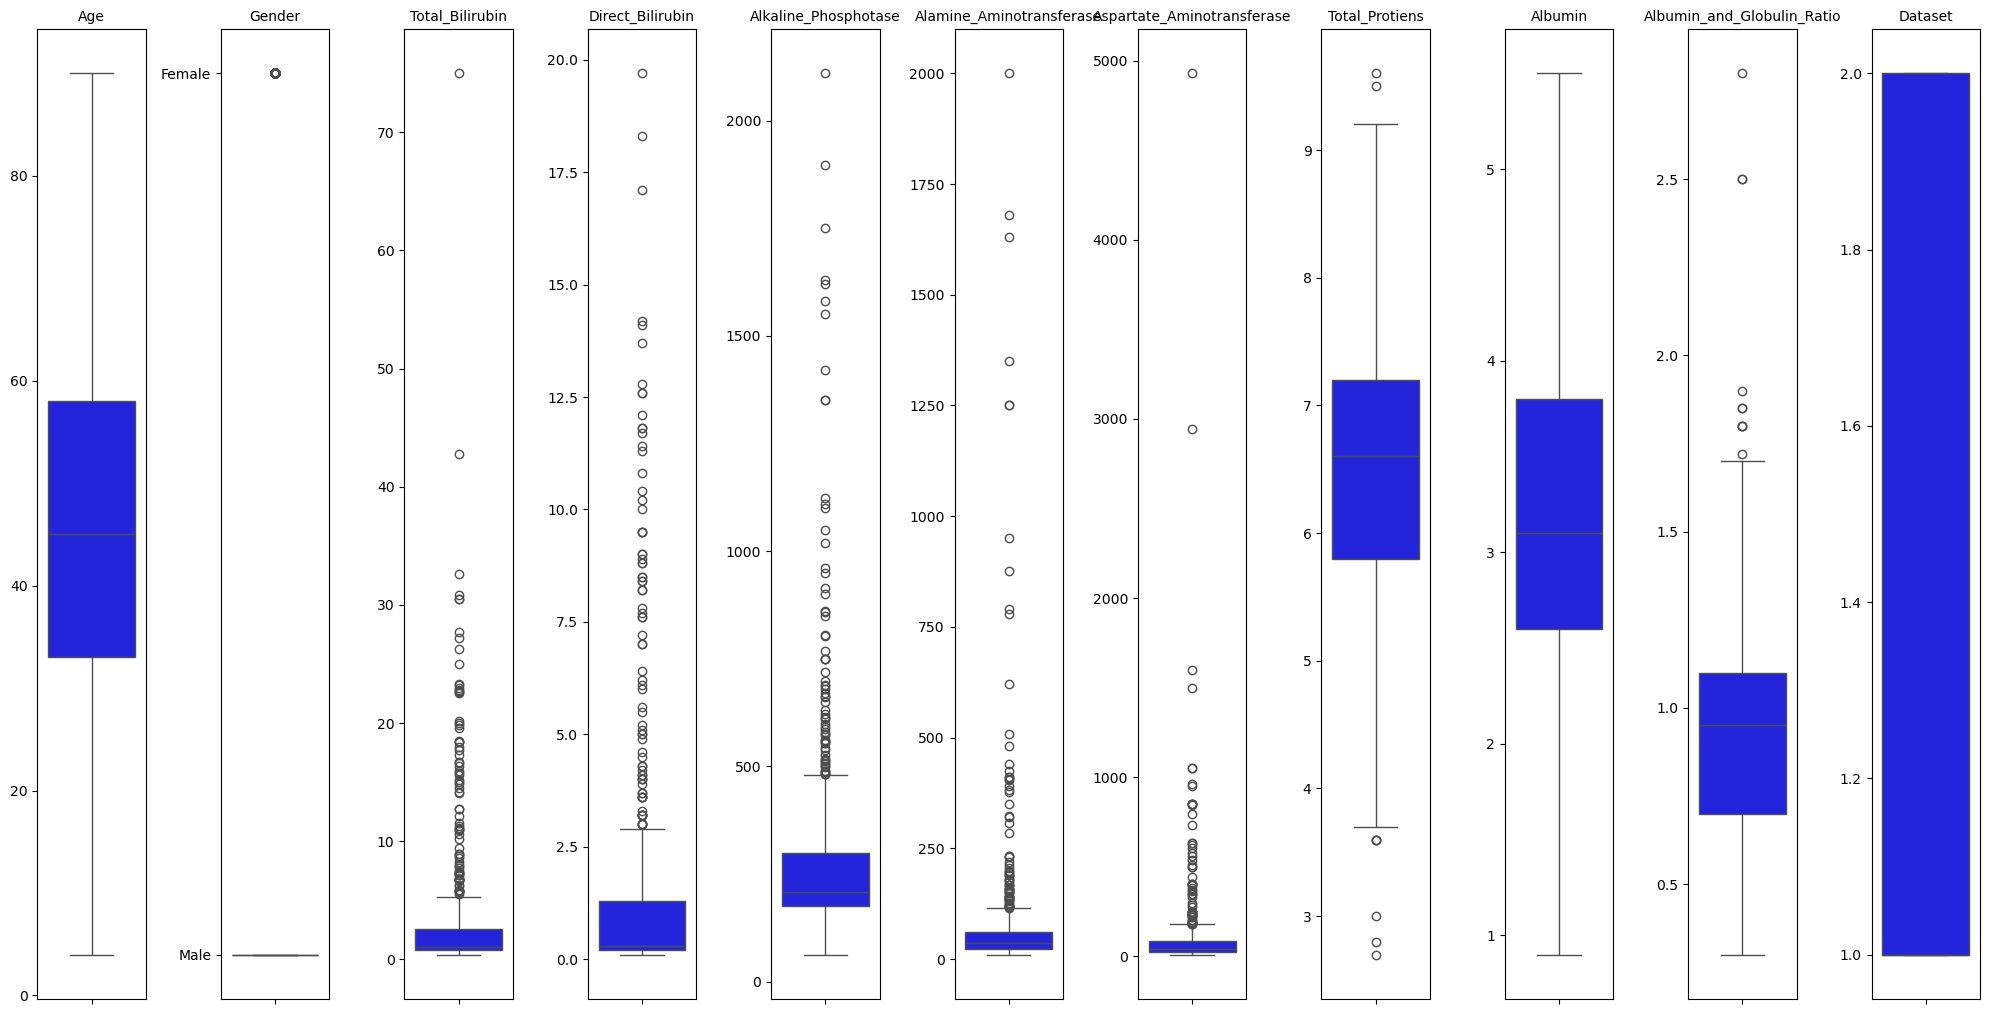

In [31]:
features = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset']

plt.figure(figsize=(20, 30))  # Increased height
rows = 3
cols = 11  # Adjust according to number of features
for i in range(len(features)):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(y=df[features[i]], color='#0606f9')
    plt.title(features[i], fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

In [61]:

# Function to detect outliers in each numeric column
def detect_outliers(df):
    outliers = {}
    
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    for column in numeric_df.columns:
        # Calculate Q1, Q3, and IQR for the column
        Q1 = numeric_df[column].quantile(0.25)
        Q3 = numeric_df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers[column] = numeric_df[column][(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)]
    
    return outliers

# Detect outliers in the dataset
outliers = detect_outliers(df)

# Print the results
for column, outlier_values in outliers.items(): 
    print(f"Outliers in {column}: {outlier_values.values}")


Outliers in Age: []
Outliers in Total_Bilirubin: []
Outliers in Direct_Bilirubin: []
Outliers in Alkaline_Phosphotase: [1.67348882 1.6407201 ]
Outliers in Alamine_Aminotransferase: []
Outliers in Aspartate_Aminotransferase: []
Outliers in Total_Protiens: []
Outliers in Albumin: []
Outliers in Albumin_and_Globulin_Ratio: []
Outliers in Dataset: []


capping

In [52]:
# List of columns where outliers need to be capped
columns_with_outliers = [
    "Total_Bilirubin",
    "Direct_Bilirubin",
    "Alkaline_Phosphotase",
    "Alamine_Aminotransferase",
    "Aspartate_Aminotransferase",
    "Total_Protiens",
    "Albumin_and_Globulin_Ratio"
]

# Function to cap outliers using IQR method without using clip()
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap values manually
    df.loc[df[col] < lower_limit, col] = lower_limit
    df.loc[df[col] > upper_limit, col] = upper_limit

# Apply the outlier capping function to all specified columns
for col in columns_with_outliers:
    cap_outliers(df, col)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2532\3739388883.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-32.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_limit, col] = lower_limit
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2532\3739388883.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-67.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_limit, col] = lower_limit


skewness handling

In [60]:
# Step 1: Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Calculate skewness
skew_values = df[numerical_cols].skew().sort_values(ascending=False)

# Step 3: Print skewness for all numerical columns
print("Skewness of numerical columns:\n")   
print(skew_values)

# Step 4: Print only columns with high skewness
skew_threshold = 0.5
highly_skewed = skew_values[abs(skew_values) > skew_threshold]

print("\nHighly skewed columns (|skew| > 0.5):\n")
print(highly_skewed)



Skewness of numerical columns:

Dataset                       0.940320
Direct_Bilirubin              0.431602
Total_Bilirubin               0.376384
Albumin_and_Globulin_Ratio    0.347884
Alkaline_Phosphotase          0.186503
Aspartate_Aminotransferase    0.137539
Alamine_Aminotransferase      0.076339
Age                          -0.046597
Albumin                      -0.060829
Total_Protiens               -0.228039
dtype: float64

Highly skewed columns (|skew| > 0.5):

Dataset    0.94032
dtype: float64


In [58]:
import numpy as np
from scipy import stats

# List of columns with high skewness
positive_skew = ["Aspartate_Aminotransferase","Alamine_Aminotransferase","Alkaline_Phosphotase"]

# Apply log transformation to positively skewed columns
for col in positive_skew:
    df[col] = np.log1p(df[col])  # log1p handles log(0) by doing log(x + 1)

# Optionally, if you want to check skew again after transformation
skew_values_after_transformation = df[numerical_cols].skew().sort_values(ascending=False)
print("Skewness after transformation:\n", skew_values_after_transformation)


Skewness after transformation:
 Dataset                       0.940320
Direct_Bilirubin              0.431602
Total_Bilirubin               0.376384
Albumin_and_Globulin_Ratio    0.347884
Alkaline_Phosphotase          0.186503
Aspartate_Aminotransferase    0.137539
Alamine_Aminotransferase      0.076339
Age                          -0.046597
Albumin                      -0.060829
Total_Protiens               -0.228039
dtype: float64


In [56]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
# List of columns to transform
cols_to_transform = ["Direct_Bilirubin","Total_Bilirubin"]
# Apply transformation
df[cols_to_transform] = pt.fit_transform(df[cols_to_transform])


EDA

Univariate Analysis for Numerical Features

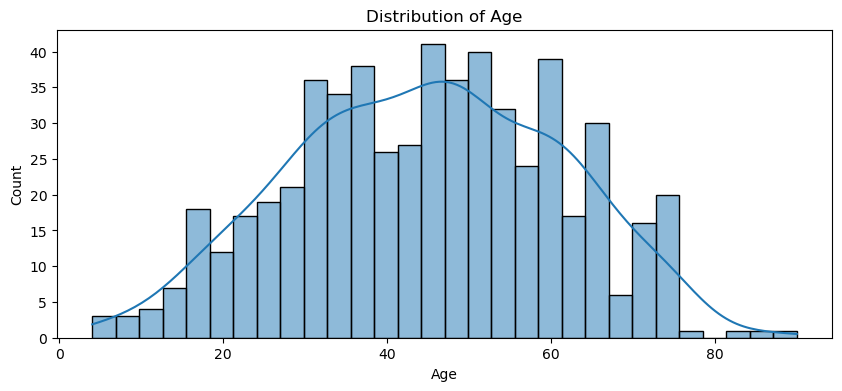

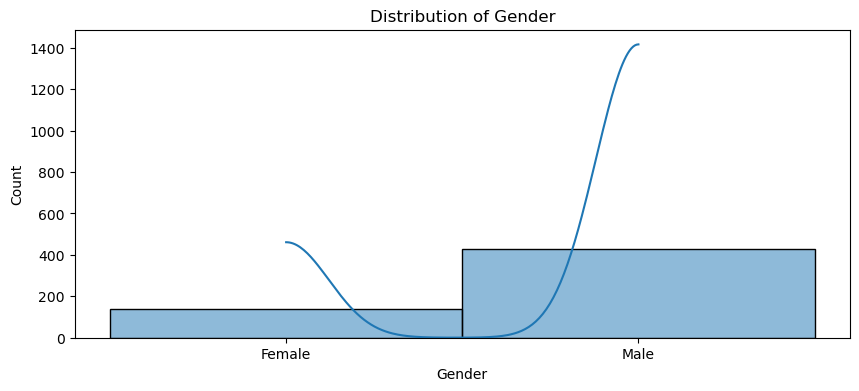

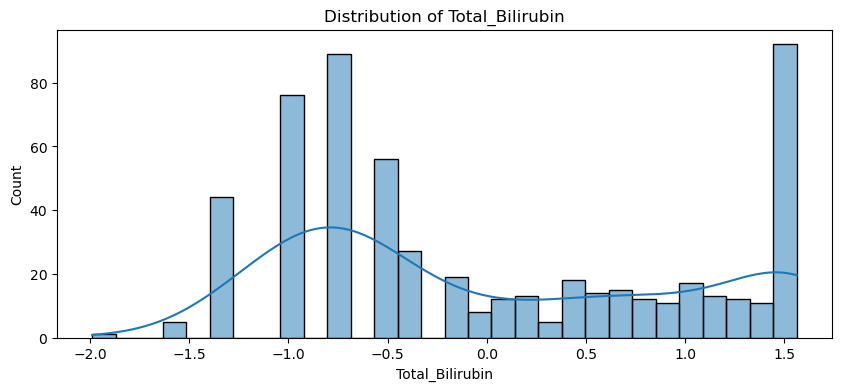

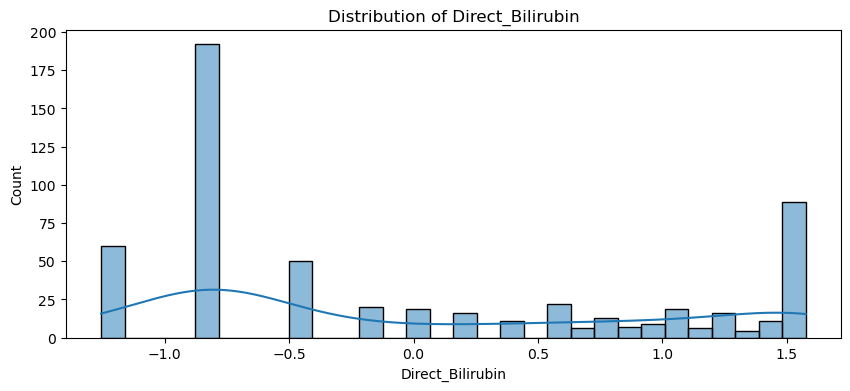

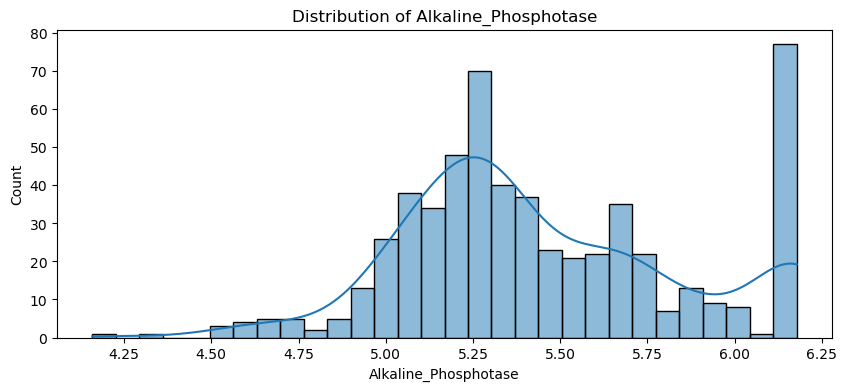

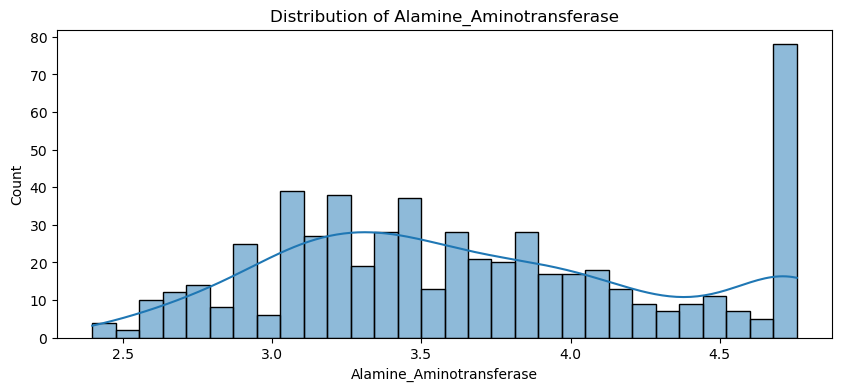

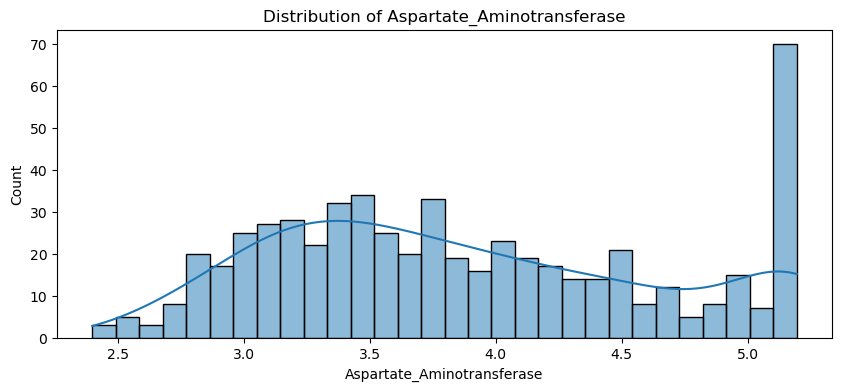

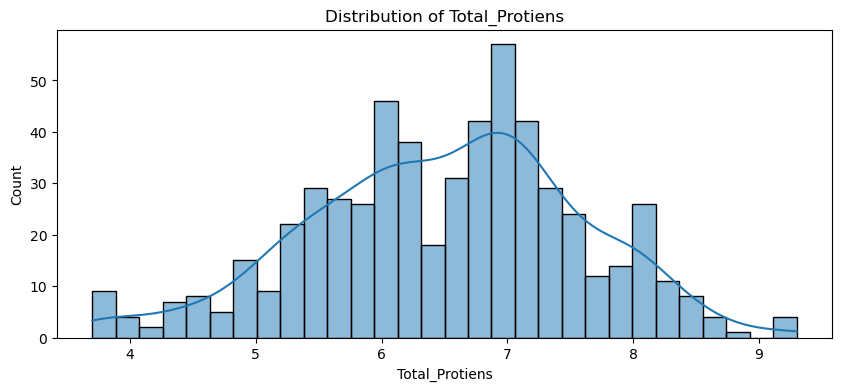

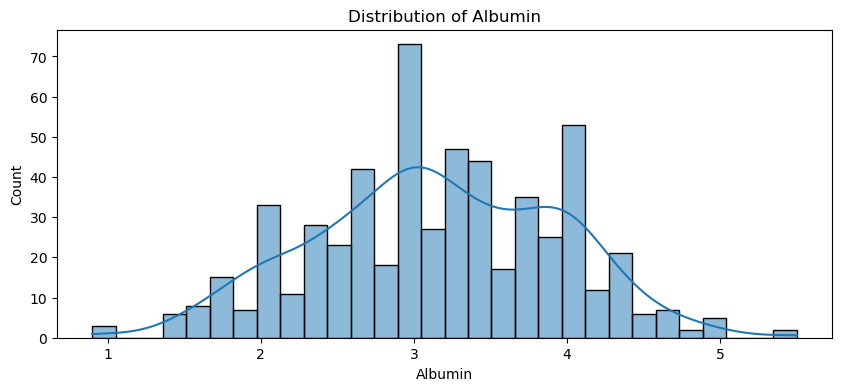

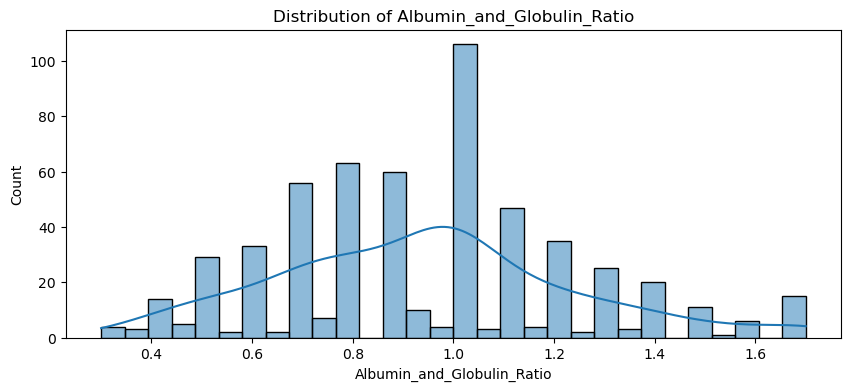

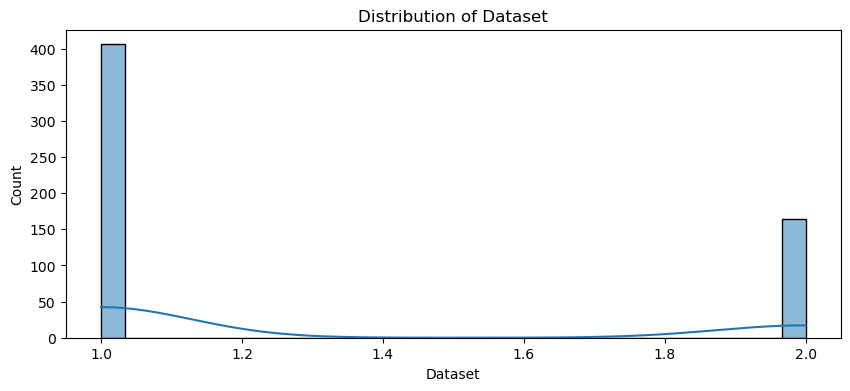

In [39]:
for i in df:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[i], kde=True, bins= 30)
    plt.title(f'Distribution of {i}')
    plt.show()


Univariate Analysis For Categorical Features

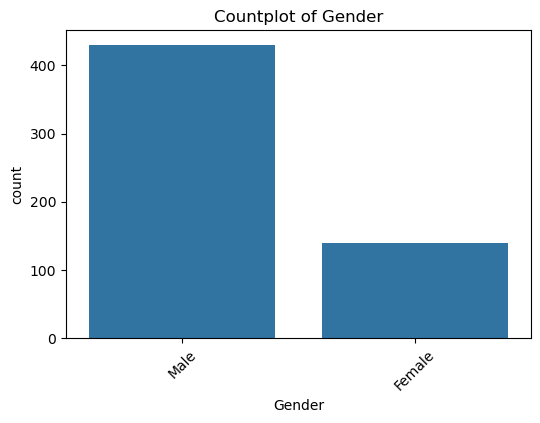

In [40]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()


Bivariate Analysis For Numerical Features

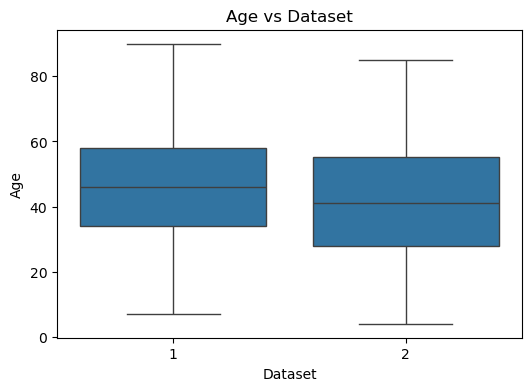

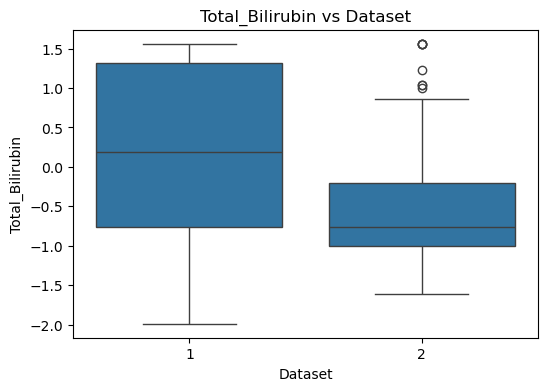

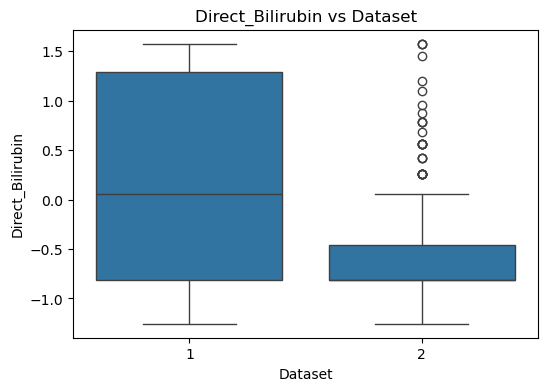

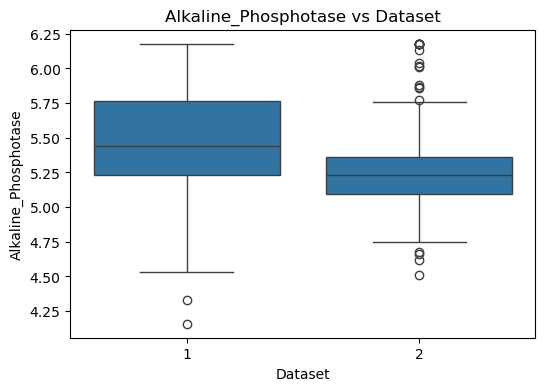

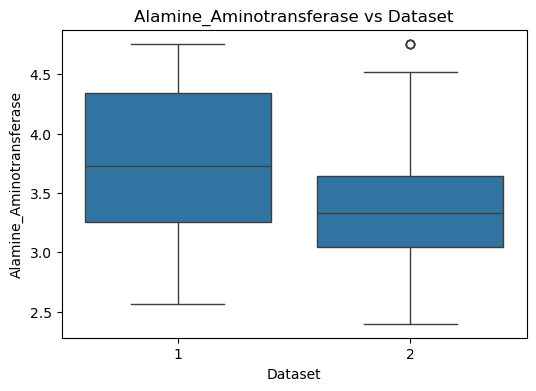

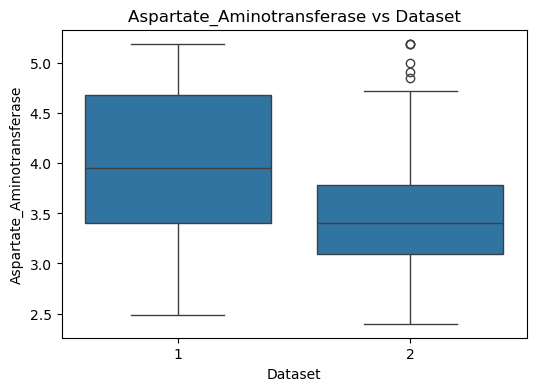

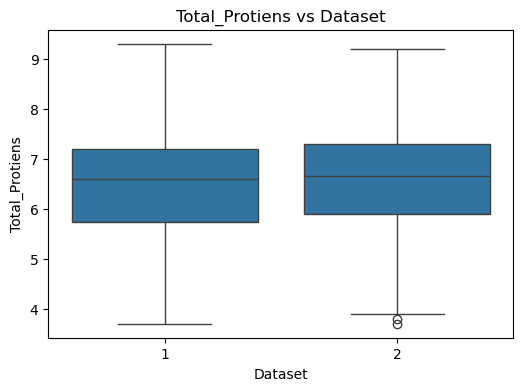

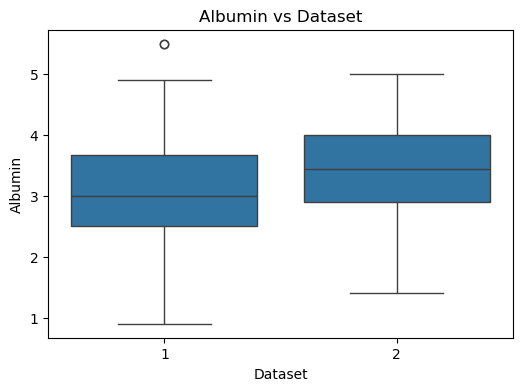

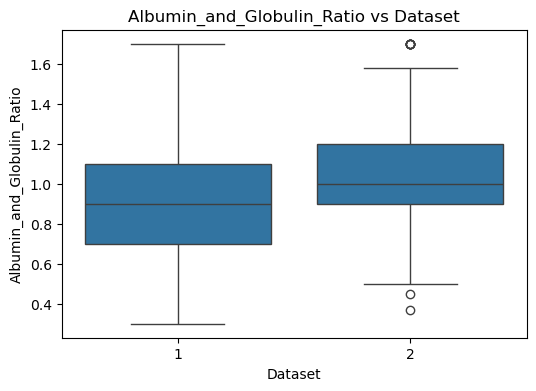

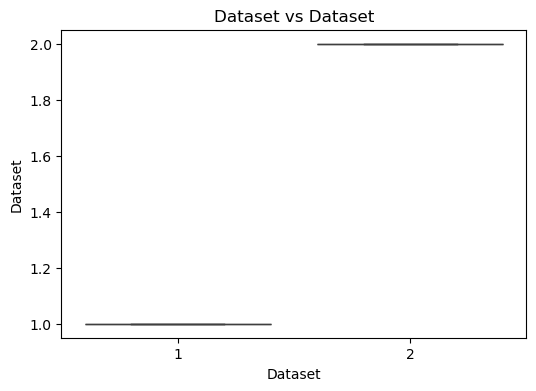

In [41]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Dataset', y=col)
    plt.title(f'{col} vs Dataset')
    plt.show()

Bivariate Analysis For Categorical Features

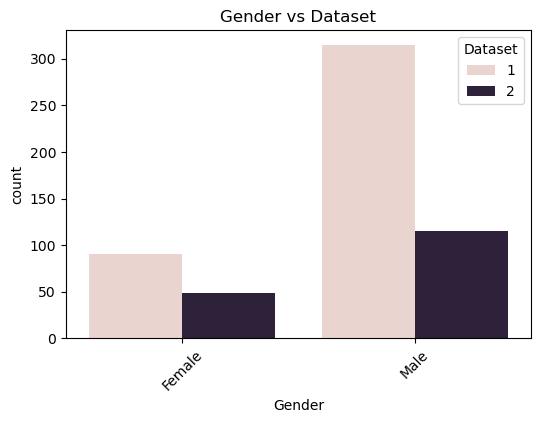

In [42]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Dataset')
    plt.title(f'{col} vs Dataset')
    plt.xticks(rotation=45)
    plt.show()


lable Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()
columns_to_encode = ['Gender']

df["Gender"] = label_encoder.fit_transform(df["Gender"])   

logestic

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Define features and target
x = df[['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 
        'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 
        'Total_Protiens', 'Albumin']]
y = df['Dataset']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# Apply scaling before SMOTE
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to scaled training data
smote = SMOTE(random_state=150)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize and fit random forest model
model_2 = RandomForestClassifier(n_estimators=70, random_state=60)
model_2.fit(X_resampled, y_resampled)

# Predictions
y_pred = model_2.predict(X_test_scaled)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.6754385964912281
Confusion Matrix:
 [[62 19]
 [18 15]]
Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.77      0.77        81
           2       0.44      0.45      0.45        33

    accuracy                           0.68       114
   macro avg       0.61      0.61      0.61       114
weighted avg       0.68      0.68      0.68       114



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Define features and target
x = df[['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 
        'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 
        'Total_Protiens', 'Albumin']]
y = df['Dataset']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to training data
smote = SMOTE(random_state=150)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize and fit random forest model
model_2 = RandomForestClassifier(n_estimators=70, random_state=60)
model_2.fit(X_resampled, y_resampled)

# Predictions
y_pred = model_2.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7631578947368421
Confusion Matrix:
 [[67 14]
 [13 20]]
Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.83      0.83        81
           2       0.59      0.61      0.60        33

    accuracy                           0.76       114
   macro avg       0.71      0.72      0.71       114
weighted avg       0.77      0.76      0.76       114



In [46]:
import pickle

# Save to file
with open('lp.pkl', 'wb') as file:
    pickle.dump(model_2, file)

print("Model saved as Liver patient.pkl ✅")

Model saved as Liver patient.pkl ✅


In [47]:
# Load from file
with open('lp.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use it to predict
prediction = loaded_model.predict([[50,2.2,150,21,151,7.3,4.4]])
print("Predicted liver patient:", prediction)

Predicted liver patient: [1]


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
